In [1]:
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import pandas as pd
from scipy.interpolate import CubicSpline
sns.set()

# Zadanie 1

W tym zadaniu chcemy przedstawić funkcję $\rho(h)$ jako funkcję kwadratową. Wykonamy to dla dwóch wersji.

## Wersja z funkcją wbudowaną

In [2]:
h = np.array([0,3,6])
rho = np.array([1.225,0.905,0.652])

In [3]:
coefficiants = np.polyfit(h,rho,2)
a,b,c=coefficiants

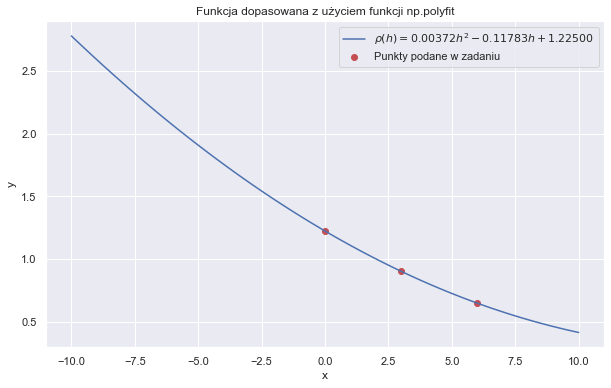

In [4]:
x=np.linspace(-10,10,100)
y=a*x**2+b*x+c

plt.figure(figsize=(10,6))
plt.scatter(h,rho, color='r', label="Punkty podane w zadaniu")
plt.plot(x,y,label=f"$ρ(h) = {a:.5f}h^2 {b:.5f}h + {c:.5f}$")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Funkcja dopasowana z użyciem funkcji np.polyfit")
plt.legend()

## Wersja bez funkcji wbudowanej

Użyjmy do tego metody Lagrange'a.

Dla każdego punktu $(x_i,y_i)$ w zestawie danych, obliczamy wielomian $L_i(x)$ i mnożymy przez wartość $y_i$, a następnie sumujemy wszystkie takie produkty, aby otrzymać wartość interpolowanego wielomianu w punkcie $h$.

In [5]:
def lagrange_interpolation(x, y, h):
    n = len(x)
    result = 0
    for i in range(n):
        term = y[i]
        for j in range(n):
            if i != j:
                term = term * (h - x[j]) / (x[i] - x[j])
        result += term
    return result

In [6]:
y_list=[]
for i in np.arange(-10,10,0.001):
    y_list.append(lagrange_interpolation(h,rho,i))

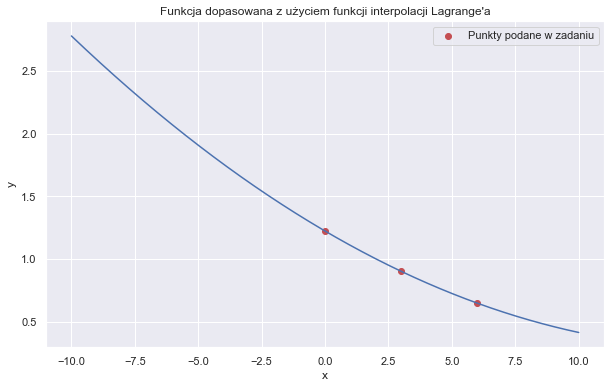

In [7]:
x_lin=np.linspace(-10,10,20000)
plt.figure(figsize=(10,6))
plt.plot(x_lin,y_list)
plt.scatter(h,rho, color='r', label="Punkty podane w zadaniu")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Funkcja dopasowana z użyciem funkcji interpolacji Lagrange'a")
plt.legend()

## Porównanie funkcji

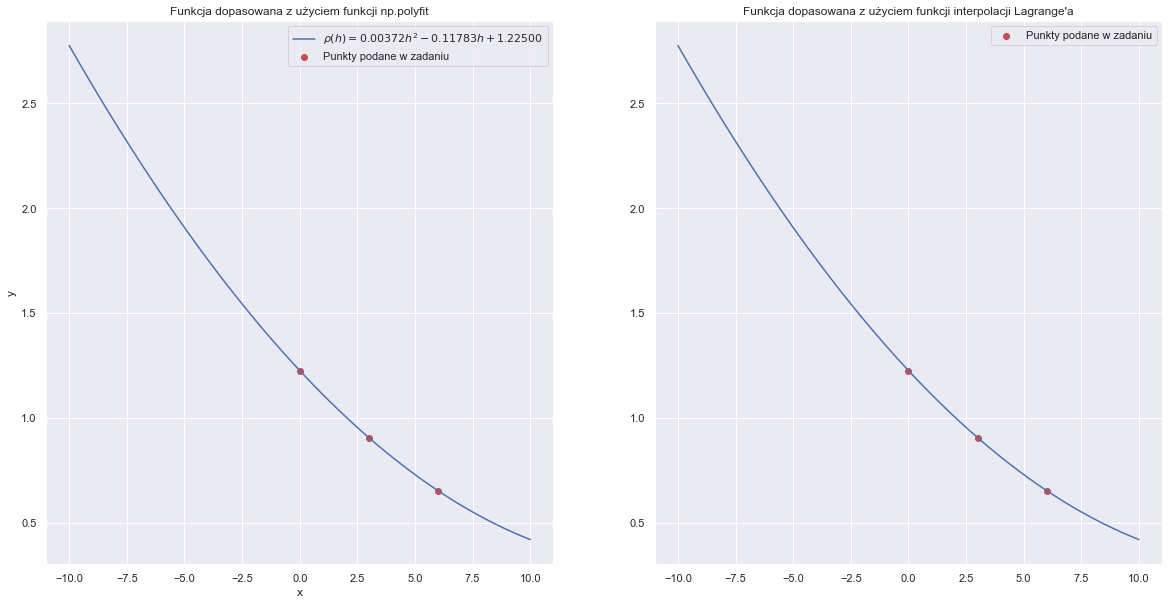

In [8]:
fig, axes=plt.subplots(nrows=1,ncols=2, figsize=(20,10))

axes[0].scatter(h,rho, color='r', label="Punkty podane w zadaniu")
axes[0].plot(x,y,label=f"$ρ(h) = {a:.5f}h^2 {b:.5f}h + {c:.5f}$")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].set_title("Funkcja dopasowana z użyciem funkcji np.polyfit")
axes[0].legend()

axes[1].plot(x_lin,y_list)
axes[1].scatter(h,rho, color='r', label="Punkty podane w zadaniu")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[1].set_title("Funkcja dopasowana z użyciem funkcji interpolacji Lagrange'a")
axes[1].legend()

# Zadanie 2

W tym zadaniu wykorzystamy funkcję *CubicSpline* z biblioteki *scipy.interpolate*. Jest to rodzaj interpolacji, w którym funkcja składa się z kawałkowych wielomianów trzeciego stopnia.

In [9]:
Re = np.array([0.2, 2, 20, 200, 2000, 20000])
cD = np.array([103, 13.9, 2.72, 0.8, 0.401, 0.433])

In [10]:
spline = CubicSpline(Re, cD)
values = [5, 50, 5000]
results = spline(values)
for re, cd in zip(values, results):
    print(f"cD dla Re = {re} wynosi: {cd:.5f}")

cD dla Re = 5 wynosi: -84.02350
cD dla Re = 50 wynosi: 436.41379
cD dla Re = 5000 wynosi: 54738.99117


## Wykres

In [11]:
Re_values = np.linspace(0.2, 20000, 1000)
cD_values_spline = spline(Re_values)

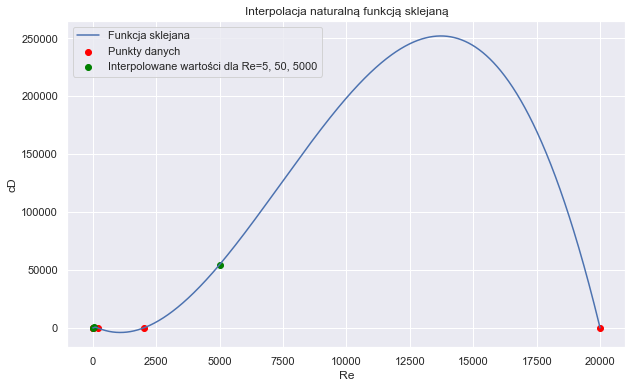

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(Re_values, cD_values_spline, label="Funkcja sklejana")
plt.scatter(Re, cD, color='red', label="Punkty danych")
plt.scatter([5, 50, 5000], spline([5, 50, 5000]), color='green', label="Interpolowane wartości dla Re=5, 50, 5000")
plt.xlabel("Re")
plt.ylabel("cD")
plt.title("Interpolacja naturalną funkcją sklejaną")
plt.legend()
plt.grid(True)
plt.show()

# Zadanie 3

## Z użyciem funkcji wbudowanej

In [13]:
Re = np.array([0.2, 2, 20, 200, 2000, 20000])
cD = np.array([103, 13.9, 2.72, 0.8, 0.401, 0.433])

coefficients_zad_3 = np.polyfit(Re, cD, 6)
polynomial_zad_3 = np.poly1d(coefficients_zad_3)

values = [5, 50, 5000]
results = polynomial_zad_3(values)

for re, cd in zip(values, results):
    print(f"cD dla Re = {re} wynosi: {cd:.5f}")


cD dla Re = 5 wynosi: -96.11486
cD dla Re = 50 wynosi: 2584.69571
cD dla Re = 5000 wynosi: 1886496560.21231


c:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


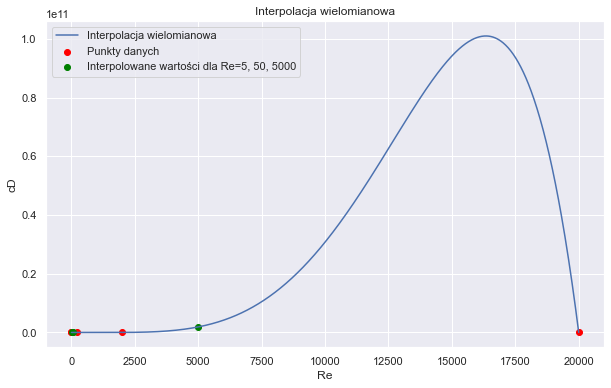

In [14]:
Re_values = np.linspace(0.2, 20000, 1000)
cD_values_poly = polynomial_zad_3(Re_values)

plt.figure(figsize=(10, 6))
plt.plot(Re_values, cD_values_poly, label="Interpolacja wielomianowa")
plt.scatter(Re, cD, color='red', label="Punkty danych")
plt.scatter(values, results, color='green', label="Interpolowane wartości dla Re=5, 50, 5000")
plt.xlabel("Re")
plt.ylabel("cD")
plt.title("Interpolacja wielomianowa")
plt.legend()
plt.grid(True)
plt.show()

## Bez użycia funkcji wbudowanej (metoda interpolacji Lagrange'a)

In [15]:
results = [lagrange_interpolation(Re, cD, val) for val in values]

In [16]:
for re, cd in zip(values, results):
    print(f"cD dla Re = {re} wynosi: {cd:.5f}")

cD dla Re = 5 wynosi: -96.10046
cD dla Re = 50 wynosi: 2581.14412
cD dla Re = 5000 wynosi: 1658455172.08550


In [17]:
cD_values_lagrange = [lagrange_interpolation(Re, cD, val) for val in Re_values]

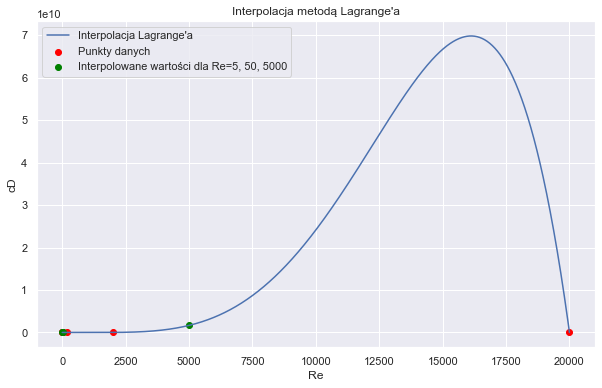

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(Re_values, cD_values_lagrange, label="Interpolacja Lagrange'a")
plt.scatter(Re, cD, color='red', label="Punkty danych")
plt.scatter(values, results, color='green', label="Interpolowane wartości dla Re=5, 50, 5000")
plt.xlabel("Re")
plt.ylabel("cD")
plt.title("Interpolacja metodą Lagrange'a")
plt.legend()
plt.grid(True)
plt.show()

## Porównanie wykresów z zadania 2 i 3

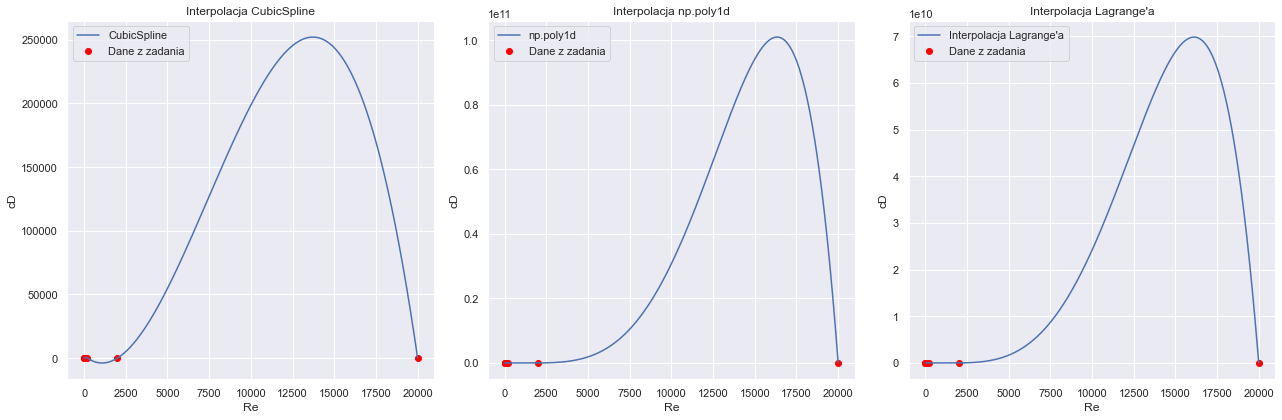

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Wykres dla CubicSpline
axs[0].plot(Re_values, cD_values_spline, label="CubicSpline")
axs[0].scatter(Re, cD, color='red', label="Dane z zadania")
axs[0].set_title("Interpolacja CubicSpline")
axs[0].set_xlabel("Re")
axs[0].set_ylabel("cD")
axs[0].legend()

# Wykres dla np.poly1d
axs[1].plot(Re_values, cD_values_poly, label="np.poly1d")
axs[1].scatter(Re, cD, color='red',label="Dane z zadania")
axs[1].set_title("Interpolacja np.poly1d")
axs[1].set_xlabel("Re")
axs[1].set_ylabel("cD")
axs[1].legend()

# Wykres dla interpolacji Lagrange'a
axs[2].plot(Re_values, cD_values_lagrange, label="Interpolacja Lagrange'a")
axs[2].scatter(Re, cD, color='red',label="Dane z zadania")
axs[2].set_title("Interpolacja Lagrange'a")
axs[2].set_xlabel("Re")
axs[2].set_ylabel("cD")
axs[2].legend()

plt.tight_layout()
plt.show()

## Porównanie metod

|          | **CubicSpline** | **polyfit**      | **Interpolacja Lagrange'a** |
|----------|-----------------|------------------|-----------------------------|
| **5**    | -84.02350       | -96.11486        | -96.10046                   |
| **50**   | 436.41379       | 2584.69571       | 2581.14412                  |
| **5000** | 54738.99117     | 1886496560.21231 | 1658455172.08550            |

# Zadanie 4

Funkcja nasza ma postać:

$f(x)=ae^{bx}$, dlatego zlogarytmujemy ją.

$\text{log}{f(x)}=\text{log}{a}+bx$

Niech $y=\text{log}{a}+bx$

In [20]:
x = np.array([1.2, 2.8, 4.3, 5.4, 6.8, 7.9])
y = np.array([7.5, 16.1, 38.9, 67.0, 146.6, 266.2])

In [21]:
y_log = np.log(y)

b = np.sum((x - np.mean(x)) * (y_log - np.mean(y_log))) / np.sum((x - np.mean(x)) ** 2)
a = np.exp(np.mean(y_log)- b * np.mean(x))

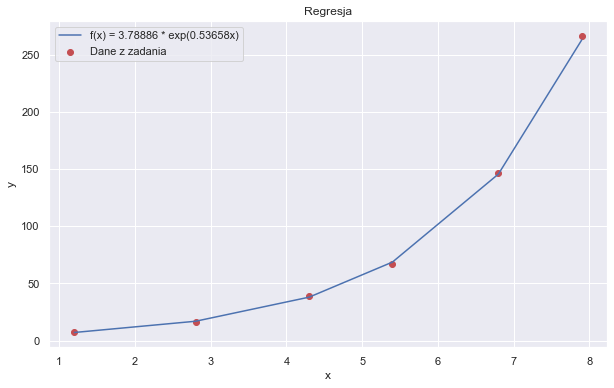

In [22]:
ys = a * np.exp(b * x)

plt.figure(figsize=(10,6))
plt.scatter(x,y, label="Dane z zadania", color='r')
plt.plot(x,ys, label=f"f(x) = {a:.5f} * exp({b:.5f}x)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresja")
plt.legend()

# Zadanie 5

In [23]:
T = np.array([0, 21.1, 37.8, 54.4, 71.1, 87.8, 100])
mu_k = np.array([1.79, 1.13, 0.696, 0.519, 0.338, 0.321, 0.296])

In [24]:
coefficients = np.polyfit(T, mu_k, 3)

In [25]:
p = np.poly1d(coefficients)

In [26]:
p

poly1d([-8.45886166e-07,  3.28569164e-04, -3.93212797e-02,  1.79570895e+00])

Wielomian ma postać: $T(\mu_{k})=-8.45886166\cdot 10^{-7}x^3 + 3.28569164\cdot 10^{-4}x^2 + -3.93212797\cdot 10^{-2}x + 1.79570895$.

In [27]:
T_values = [10, 30, 60, 90]
mu_k_values = p(T_values)

## Obliczenie wartości

In [28]:
for t, mu in zip(T_values, mu_k_values):
    print(f"µk dla T = {t}°C: {mu:.5f} * 10^(-3) m^2/s")

µk dla T = 10°C: 1.43451 * 10^(-3) m^2/s
µk dla T = 30°C: 0.88894 * 10^(-3) m^2/s
µk dla T = 60°C: 0.43657 * 10^(-3) m^2/s
µk dla T = 90°C: 0.30155 * 10^(-3) m^2/s


## Wykres

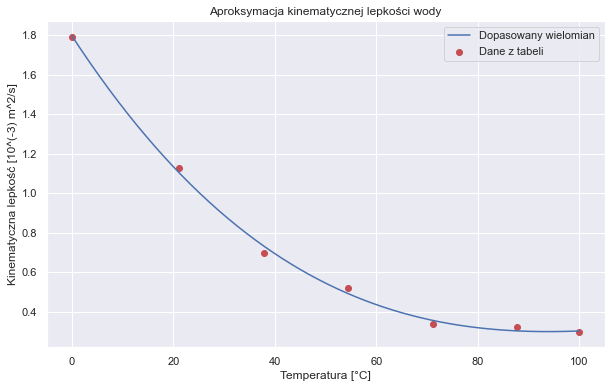

In [29]:
T_plot = np.linspace(0, 100, 500)
mu_k_plot = p(T_plot)

plt.figure(figsize=(10, 6))
plt.scatter(T,mu_k, label="Dane z tabeli", color='r')
plt.plot(T_plot,mu_k_plot, label="Dopasowany wielomian")
plt.title('Aproksymacja kinematycznej lepkości wody')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Kinematyczna lepkość [10^(-3) m^2/s]')
plt.legend()

# Zad 6

In [30]:
x = np.array([1.0, 2.5, 3.5, 4.0, 1.1, 1.8, 2.2, 3.7])
y = np.array([6.008, 15.722, 27.13, 33.772, 5.257, 9.549, 11.098, 28.828])

In [31]:
coeff_linear = np.polyfit(x, y, 1)
coeff_quadratic = np.polyfit(x, y, 2)

In [32]:
p_linear = np.poly1d(coeff_linear)
p_quadratic = np.poly1d(coeff_quadratic)

Text(0.5, 1.0, 'Dopasowanie funkcji liniowej i funkcji kwadratowej do danych z zadania')

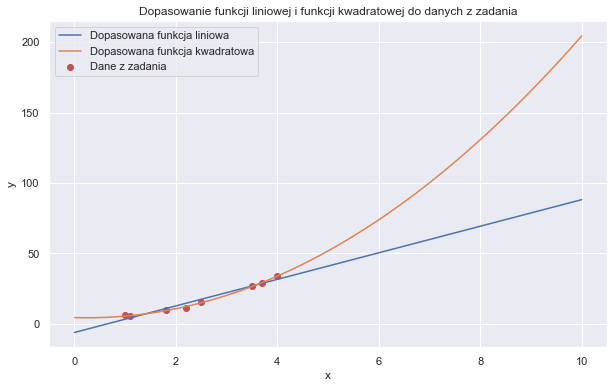

In [33]:
linspace_plot=np.linspace(0,10,50)

linear_function=p_linear(linspace_plot)
quadratic_function=p_quadratic(linspace_plot)

plt.figure(figsize=(10,6))
plt.scatter(x,y, label="Dane z zadania", color='r')
plt.plot(linspace_plot,linear_function, label="Dopasowana funkcja liniowa")
plt.plot(linspace_plot,quadratic_function, label="Dopasowana funkcja kwadratowa")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Dopasowanie funkcji liniowej i funkcji kwadratowej do danych z zadania")

W celu sprawdzenia, które dopasowanie jest lepsze, policzymy wartości obu funkcji dla $x$ z tabeli, a następnie policzymy ich błąd średniokwadratowy.

In [34]:
y_linear=p_linear(x)
y_quadratic=p_quadratic(x)

In [35]:
mse_linear=np.sqrt(np.mean((y-y_linear)**2))
mse_quadratic=np.sqrt(np.mean((y-y_quadratic)**2))

In [36]:
print(f'Błąd średniokwadratowy dla dopasowania liniowego: {mse_linear}')
print(f'Błąd średniokwadratowy dla dopasowania kwadratowego: {mse_quadratic}')

Błąd średniokwadratowy dla dopasowania liniowego: 1.9429832700254899
Błąd średniokwadratowy dla dopasowania kwadratowego: 0.6426759826418781


**Wniosek:** błąd średniokwadratowy dla dopasowania kwadratowego jest mniejszy, dlatego dopasowanie kwadratowe jest lepsze.